In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


import joblib

In [13]:
data = pd.read_csv("train.csv", sep = ",")

In [14]:
asia = ["Philippines", "India", "South", "China", "Vietnam", "Japan", "Taiwan", "Iran", "Thailand", "Cambodia", "Laos", "Hong"]
europe = ["Germany", "England", "Italy", "Poland", "Portugal", "Greece", "France", "Ireland", "Yugoslavia", "Hungary", "Scotland", "Netherlands"]
north_america = ["USA", "Canada"]
central_america = ["Mexico", "Puerto-Rico", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic", "Guatemala", "Haiti", "Nicaragua", "Caribbean", "Honduras"]
south_america = ["Columbia", "Peru", "Ecuador"]

for i in range(len(data)):
    if data.loc[i, "F13"] in asia:
        data.F13.replace(data.loc[i, "F13"], "asia", inplace = True)
    elif data.loc[i, "F13"] in europe:
        data.F13.replace(data.loc[i, "F13"], "europe", inplace = True)
    elif data.loc[i, "F13"] in north_america:
        data.F13.replace(data.loc[i, "F13"], "north_america", inplace = True)
    elif data.loc[i, "F13"] in central_america:
        data.F13.replace(data.loc[i, "F13"], "central_america", inplace = True)
    elif data.loc[i, "F13"] in south_america:
        data.F13.replace(data.loc[i, "F13"], "south_america", inplace = True)

# for i in range(len(test)):
#     if test.loc[i, "F13"] in asia:
#         test.F13.replace(test.loc[i, "F13"], "asia", inplace = True)
#     if test.loc[i, "F13"] in europe:
#         test.F13.replace(test.loc[i, "F13"], "europe", inplace = True)
#     if test.loc[i, "F13"] in north_america:
#         test.F13.replace(test.loc[i, "F13"], "north_america", inplace = True)
#     if test.loc[i, "F13"] in central_america:
#         test.F13.replace(test.loc[i, "F13"], "central_america", inplace = True)
#     if test.loc[i, "F13"] in south_america:
#         test.F13.replace(test.loc[i, "F13"], "south_america", inplace = True)

In [15]:
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,K1,77516,R1,13,Q1,P1,M1,caucasian,Male,2174,0,40,north_america,0
1,50,K2,83311,R1,13,Q2,P2,M2,caucasian,Male,0,0,13,north_america,0
2,38,K3,215646,R2,9,Q3,P3,M1,caucasian,Male,0,0,40,north_america,0
3,53,K3,234721,R3,7,Q2,P3,M2,black,Male,0,0,40,north_america,0
4,28,K3,338409,R1,13,Q2,P4,M3,black,Female,0,0,40,central_america,0


In [16]:
# Colonne feature categoriche
colF1 = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']
colF3 = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']
colF5 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
colF6 = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
colF7 = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
colF8 = ['caucasian', 'black', 'asian', 'american', 'other']
colF9 = ['Male', 'Female']
colF13 = ['asia', 'europe', 'north_america', 'central_america', 'south_america']

# Codifica delle feature categoriche
data.F1.replace(colF1, [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
data.F3.replace(colF3, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
data.F5.replace(colF5, [0, 1, 2, 3, 4, 5, 6], inplace = True)
data.F6.replace(colF6, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
data.F7.replace(colF7, [0, 1, 2, 3, 4, 5], inplace = True)
data.F8.replace(colF8, [0, 1, 2, 3, 4], inplace = True)
data.F9.replace(colF9, [0, 1], inplace = True)
data.F13.replace(colF13, [0, 1, 2, 3, 4], inplace = True)

# test.F1.replace(colF1, [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
# test.F3.replace(colF3, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
# test.F5.replace(colF5, [0, 1, 2, 3, 4, 5, 6], inplace = True)
# test.F6.replace(colF6, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
# test.F7.replace(colF7, [0, 1, 2, 3, 4, 5], inplace = True)
# test.F8.replace(colF8, [0, 1, 2, 3, 4], inplace = True)
# test.F9.replace(colF9, [0, 1], inplace = True)
# test.F13.replace(colF13, [0, 1, 2, 3, 4], inplace = True)

In [17]:
x_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values
print(x_train.shape)
print(y_train.shape)

(32561, 14)
(32561,)


In [18]:
# Imputazione dei valori NaN tramite SimpleImputer, con la strategia che sostituisce i valori mancanti con la moda dei valori della feature
print("SimpleImputer")
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
x_train_notnan = imp.fit_transform(x_train)
# x_test_notnan = imp.transform(x_test)
print(x_train_notnan[pd.isna(x_train[:,0]),0][0:10])
# print(x_test_notnan[pd.isna(x_test[:,0]),0][0:10])

SimpleImputer
[]


In [19]:
# Creazione DataFrame da insiemi di train e test dopo l'imputazione dei valori mancanti 
colF = ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

training_set_df = pd.DataFrame(x_train_notnan, columns = colF)
# test_set_df = pd.DataFrame(x_test_notnan, columns = colF)

In [20]:
# Codifica OneHot contemporaneamente su training_set_df e test_set_df
OneHotF1 = pd.get_dummies(training_set_df.F1)
OneHotF3 = pd.get_dummies(training_set_df.F3)
OneHotF5 = pd.get_dummies(training_set_df.F5)
OneHotF6 = pd.get_dummies(training_set_df.F6)
OneHotF7 = pd.get_dummies(training_set_df.F7)
OneHotF8 = pd.get_dummies(training_set_df.F8)
OneHotF9 = pd.get_dummies(training_set_df.F9)
OneHotF13 = pd.get_dummies(training_set_df.F13)

for i in range (0, len(colF1)):
    OneHotF1 = OneHotF1.rename(columns = {i: colF1[i]})
for i in range (0, len(colF3)):
    OneHotF3 = OneHotF3.rename(columns = {i: colF3[i]})
for i in range (0, len(colF5)):
    OneHotF5 = OneHotF5.rename(columns = {i: colF5[i]})
for i in range (0, len(colF6)):
    OneHotF6 = OneHotF6.rename(columns = {i: colF6[i]})
for i in range (0, len(colF7)):
    OneHotF7 = OneHotF7.rename(columns = {i: colF7[i]})
for i in range (0, len(colF8)):
    OneHotF8 = OneHotF8.rename(columns = {i: colF8[i]})
for i in range (0, len(colF9)):
    OneHotF9 = OneHotF9.rename(columns = {i: colF9[i]})
for i in range (0, len(colF13)):
    OneHotF13 = OneHotF13.rename(columns = {i: colF13[i]})


In [21]:
# Creazione newdf e newdftest con la sostituzione delle colonne generate con la codifica
training_set_df = pd.concat([training_set_df, OneHotF1, OneHotF3, OneHotF5, OneHotF6, OneHotF7, OneHotF8, OneHotF9, OneHotF13], axis = 1)
 
training_set_df = training_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)


In [22]:
training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# #feature transformation
# X['F2'] = np.log10(X['F2']+1)
# X['F10'] = np.log2(X['F10']+1)
# X['F11'] = np.log2(X['F11']+1)

# # combino valori numerici con categorici
# X = pd.concat([X,data_x_categorical],axis=1)

# X = X.astype(float)
# Y.Y = Y.Y.astype(float)

# x_train['F2'] = np.log10(x_train['F2'] + 1)
# x_train['F10'] = np.log2(x_train['F10'] + 1)
# x_train['F11'] = np.log2(x_train['F11'] + 1)


In [24]:
# pipelineSelection.optimize(x_train, y_train)

In [25]:
z_scores = stats.zscore(training_set_df["F2"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
training_set_df = training_set_df[filtered_entries]

training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Scaling con StandardScaler

print("StandardScaler")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_notnan)
# x_test_scaled = scaler.transform(x_test_notnan)

print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

# print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

StandardScaler
Media distribuzione di partenza: [3.85816468e+01 2.10589355e+00 1.89778367e+05 3.42446485e+00
 1.00806793e+01 1.08378121e+00 4.18881484e+00 1.54239735e+00
 2.21706950e-01 3.30794509e-01 1.07764884e+03 8.73038297e+01
 4.04374559e+01 1.98452136e+00]
Media distribuzione scalata: [-2.70591503e-17 -1.44897385e-16 -1.00162500e-16  1.04745098e-17
  1.47188684e-16  5.91373365e-17  1.00380719e-16 -6.11013071e-18
 -1.59299836e-17 -8.21594361e-17  1.30931372e-17  1.01690033e-16
 -1.54935457e-17  1.94214869e-16]
Deviazione standard distribuzione di partenza: [1.36402231e+01 9.13017472e-01 1.05548357e+05 3.45352855e+00
 2.57268083e+00 1.25136141e+00 2.96081286e+00 1.43740884e+00
 6.27338475e-01 4.70499205e-01 7.38517868e+03 4.02954031e+02
 1.23472391e+01 4.02389853e-01]
Deviazione standard distribuzione scalata: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 10, n_jobs = -1)
x_train_scaled, y_train = smote.fit_resample(x_train_scaled, y_train)
print(x_train_scaled.shape, y_train.shape)
print(x_train_scaled)

(49440, 14) (49440,)
[[ 0.03067056 -2.30652054 -1.06361075 ... -0.21665953 -0.03542945
   0.03846678]
 [ 0.83710898 -1.21125125 -1.008707   ... -0.21665953 -2.22215312
   0.03846678]
 [-0.04264203 -0.11598196  0.2450785  ... -0.21665953 -0.03542945
   0.03846678]
 ...
 [ 0.18337172 -2.30652054  0.95145387 ... -0.21665953 -0.03542945
   0.03846678]
 [-0.56230918 -0.11598196 -0.52374029 ... -0.21665953 -0.03542945
   0.03846678]
 [ 0.6400456   2.07455663  0.22831193 ...  4.60069268  0.27408977
   0.03846678]]


In [28]:
training_set_df.head(20)

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,37.0,284582.0,14.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
6,49.0,160187.0,5.0,0.0,0.0,16.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,52.0,209642.0,9.0,0.0,0.0,45.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
8,31.0,45781.0,14.0,14084.0,0.0,50.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9,42.0,159449.0,13.0,5178.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

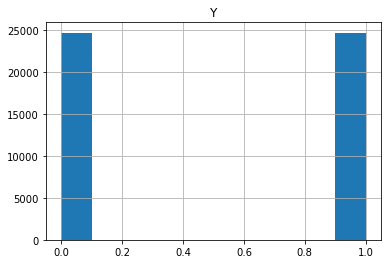

In [29]:
y_training_df = pd.DataFrame(y_train, columns = ["Y"])
y_training_df.hist()

In [30]:
from sklearn.ensemble import AdaBoostClassifier

classifierADA = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

grid = dict()
# grid['n_estimators'] = [40, 200, 1000]
# grid['learning_rate'] = [.001, .01, .1, 1]
# grid['n_estimators'] = [150, 500, 1000]
# grid['learning_rate'] = [0.01, 0.1, 1]
# grid['base_estimator__max_depth'] = [1, 2, 5]
# grid['base_estimator__min_samples_split'] = [2, 3, 5]
# grid['base_estimator__min_samples_leaf'] = [2, 5, 10]

grid['n_estimators'] = [1000]
grid['learning_rate'] = [1]
grid['base_estimator__max_depth'] = [1, 2, 5]
grid['base_estimator__min_samples_split'] = [2, 5]
grid['base_estimator__min_samples_leaf'] = [2, 5, 10]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierADA, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_fit = grid_search.fit(x_train_scaled, y_train)

# # # execute the grid search
# # y_pred_rf = grid_search.predict(x_test_scaled)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_fit.best_score_ , grid_fit.best_params_))

# # CM_ADA = confusion_matrix(y_test, y_pred_rf)
# # PercADA = (CM_ADA[0,0]+CM_ADA[1,1])/CM_ADA.sum()

# # cmd = ConfusionMatrixDisplay(CM_ADA)
# # cmd.plot(cmap = "Oranges")

# # print(PercADA)

Best: 0.903074 using {'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'learning_rate': 1, 'n_estimators': 1000}


In [ ]:
bestclf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(...))

In [ ]:
y_pred = bestclf.predict(x_train)

In [ ]:
# Salvo tutti gli oggetti addestrati
joblib.dump(imp, "pickles/imputer.pkl")
joblib.dump(scaler, "pickles/scaler.pkl")
joblib.dump(bestclf, "pickles/model.pkl")